In [19]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def show_image(img):
    assert img.dtype == np.uint8
    assert len(img.shape) == 2 or (len(img.shape) == 3 and img.shape[2] == 3)
    
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray')
    else:
        assert len(img.shape) == 3 and img.shape[2] == 3
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [21]:
def read_image(path, is_grayscale=False):

    img = cv.imread(path, cv.IMREAD_GRAYSCALE if is_grayscale else cv.IMREAD_COLOR)
    assert img is not None, f"Failed to read image from {path}"
    return img

In [22]:
# Butun fonksiyon tanimlarinin altinda bir de demo kodu yaz ve sonucu goster.
# Fonksiyonlari hem grayscale image icin hem de BGR imagelar icin yazarsan iyi olur.

In [23]:
def create_purple_image():
    pass  # 400x500'luk olup mor renkte bir imge olustur (np kullanarak)

In [24]:
def read_cs_jpg_and_draw_red_crosshair():
    pass

In [25]:
def create_checkerboard_pattern():
    pass  # 8x8

In [26]:
def add_border(img, thickness, color, fixed_resolution=True):
    pass # in-place degil (imgenin kopyasini olusturup yeni halini dondur)

# Ayni isi yapan OpenCV fonksiyonunu da not olarak ekle.

In [27]:
def increase_brightness(img, amount):
    assert isinstance(amount, int)
    assert -255 <= amount <= 255
    
    pass  # in-place 

In [28]:
def mask_image(img, mask, color):
    pass  # in-place

In [29]:
def apply_convolution(img, filter, padding=True):
    # Aslinda correlation demek daha dogru. Ama neredeyse ayni sey zaten.
    # in-place degil. padding ise img etrafinda siyah renkler (zero padding) varmis gibi dusunulebilir. Sifirdan implement et.
    # Sonra herhangi bir hazir convolution (daha dogrusu correlation) fonksiyonuyla ayni sonucu verdigini kontrol et.
    pass


    assert isinstance(padding, bool)

    assert isinstance(filter, np.ndarray)
    assert len(filter.shape) == 2
    assert filter.shape[0] % 2 == 1 and filter.shape[1] % 2 == 1
    assert filter.shape[0] == filter.shape[1]  # Aslinda illa boyle olacak diye bir sey yok da... Boyle dusunelim. Aksi halde size ve half yerine size_h, size_w, half_h, half_w gibi degiskenler tanimlamak lazim.
    assert filter.dtype == np.float32  # Boyle olmayabilir ama genelde boyle gibi. Boyle dusunelim. Degilse her zaman buna donusturebiliriz (gerekirse): filter = filter.astype(np.float32)

    assert isinstance(img, np.ndarray)
    assert len(img.shape) == 2  # Grayscale oldugunu dusunelim. (Alternatif kod: assert img.ndim == 2)
    assert img.dtype == np.uint8  # Aksine bir durum varsa da problem yok aslinda. Donusumleri ona gore ayarlariz.

    img = img.astype(np.float32) / 255  # uint8 -> float32 (cunku filter float32)

    h, w = img.shape

    size = filter.shape[0]  # e.g. 5
    half = size // 2        # e.g. 2

    # prepare img
    if padding:
        padded_img = np.zeros((h + 2 * half, w + 2 * half), dtype=np.float32)
        padded_img[half:-half,half:-half] = img  # Burada copy yapildigini varsayiyorum.
        img = padded_img
    else:
        img = img.copy()

    # prepare new_img
    if padding:
        new_img = np.zeros((h, w), dtype=np.float32)
    else:
        new_img = np.zeros((h - 2 * half, w - 2 * half), dtype=np.float32)

    # fill new_img
    new_h, new_w = new_img.shape
    for row_no in range(new_h):
        for col_no in range(new_w):
            new_img[row_no, col_no] = np.sum(img[row_no:row_no+size, col_no:col_no+size] * filter)

    new_img = np.clip(new_img, 0, 1)
    new_img = (new_img * 255).astype(np.uint8)  # float32 -> uint8 (cunku bize boyle verildi)
    
    return new_img


# TODO: Renkli imgelerde calisacak hale getir.


In [30]:
def blur_using_mean_filter(img, filter_size, padding=True):
    # average filter diye de gecer.
    pass  # in-place degil. Sadece filter'i hazirla ve apply_convolution cagir. filter_size tek bir tamsayi. Hem satir hem de sutun.

    filter = np.ones((filter_size, filter_size), dtype=np.float32) / (filter_size * filter_size)
    return apply_convolution(img, filter, padding)

    
# Ayni isi yapan OpenCV fonksiyonunu da not olarak ekle.

(426, 640)


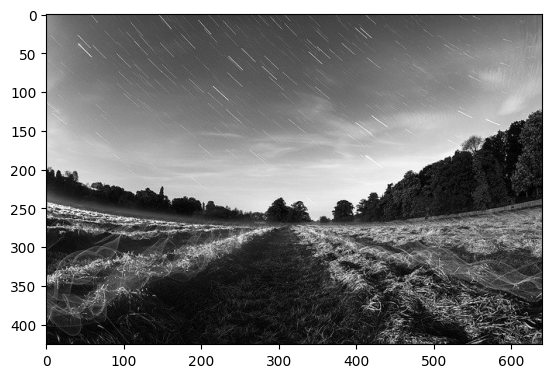

In [31]:
img = read_image('x.jpeg', is_grayscale=True)

print(img.shape)
show_image(img)

(406, 620)


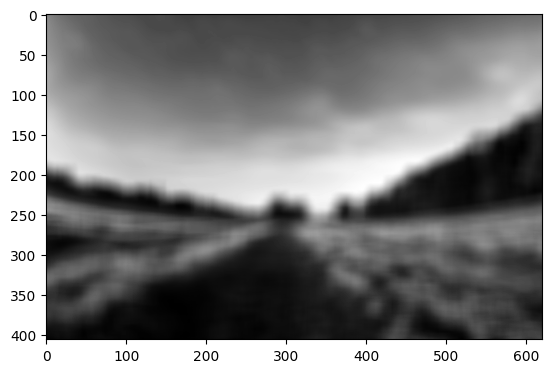

In [32]:
new_img = blur_using_mean_filter(img, 21, padding=False)

print(new_img.shape)
show_image(new_img)

In [33]:
# Opsiyonel (diger egzersizleri yapip bitirirsen yapabilirsin, yoksa yapma)
def blur_using_gaussian_filter(img, filter_size, padding=True):
    pass



# Ayni isi yapan OpenCV fonksiyonunu da not olarak ekle.

In [34]:
# Opsiyonel (diger egzersizleri yapip bitirirsen yapabilirsin, yoksa yapma)

def add_noise(img):
    pass  # Salt & pepper noise nedir ogren ve burada imgeye ekle. Istedigin yogunlukta yap.


def remove_noise(img):
    pass  # Noise iceren imgede istedigin boyutta bir median filter kullanarak noiseden kurtul. 
    # Bu islem convolution ile olmaz cunku siralama yapmayi gerektiriyor.

    # Ayni isi yapan OpenCV fonksiyonunu da not olarak ekle.

# Bir imge okuyup noise ekle ve sonra noise sil. (Normalde noise senin istegin disinda olusuyor, biz remove_noise yapiyoruz.)

In [35]:
# Opsiyonel (diger egzersizleri yapip bitirirsen yapabilirsin, yoksa yapma)

# Bilateral filter nedir ve ne icin kullanilir? Sozel cevap yeterli.

In [36]:
# Opsiyonel (diger egzersizleri yapip bitirirsen yapabilirsin, yoksa yapma)

# Edge detection yap: Sobel filter ve convolution kullanarak.
# Bir de Canny algoritmasini dene cv'den. Bunu sifirdan implement etmeye gerek yok. (Bu edge detection icin daha iyi bir algorutma)